In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import transforms
import astropy.constants as const
import pandas as pd
import cmcrameri.cm as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 


In [27]:
df = pd.read_excel("../../save/eis_sumer_ion_width_merg_v2.xlsx")
df["ion"] = df["ion"].str.strip()
df["charge"] = df["charge"].str.strip()
df["inst"] = df["inst"].str.strip()
df["quality"] = df["quality"].str.strip()
df

,ion,charge,Z,A,temp,inst,veff,veff_err,quality,desc
0,Fe,vii,6,55.85000,5.7,EIS,35.6,18.9,b,NaN
1,Fe,viii,7,55.85000,5.8,EIS,32.2,1.8,a,NaN
2,Fe,ix,8,55.85000,5.8,EIS,34.4,2.9,a,NaN
3,Fe,x,9,55.85000,5.9,EIS,36.9,1.6,a,NaN
4,Fe,xi,10,55.85000,6.0,EIS,37.4,0.4,a,NaN
5,Fe,xii,11,55.85000,6.1,EIS,40.5,1.9,a,NaN
6,Fe,xiii,12,55.85000,6.1,EIS,38.8,1.7,a,NaN
7,O,vi,5,15.99940,5.6,EIS,41.2,1.9,a,NaN
8,Mg,vi,5,24.30500,5.7,EIS,36.4,10.8,b,NaN
9,Mg,vii,6,24.30500,5.8,EIS,38.5,3.0,a,NaN


In [28]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [29]:
line_name = df["ion"] + r" \textsc{"+ df["charge"] + r"}"
veff = df["veff"]*1.e5
veff_err = df["veff_err"]*1.e5
vnt_max = np.min(veff)
veff_res = np.sqrt(np.square(veff)-np.square(vnt_max)) + 1.
veff_res_err = np.sqrt(np.square(veff-veff_err)-np.square(vnt_max))
veff_res_err = np.nan_to_num(veff_res_err,nan=1.)
T_max = np.square(veff)*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)
T_min = np.square(veff_res)*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)
T_max_err = np.square(veff+veff_err)*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)
T_min_err = np.square(veff_res_err)*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)


/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
df["T_max"] = T_max
df["T_min"] = T_min
df["T_max_err"] = T_max_err
df["T_min_err"] = T_min_err
df["Z2A"] = df["Z"]/df["A"]
df["label"] = df["ion"] + r" \textsc{"+ df["charge"] + r"}"

In [31]:
df

,ion,charge,Z,A,temp,inst,veff,veff_err,quality,desc,T_max,T_min,T_max_err,T_min_err,Z2A,label
0,Fe,vii,6,55.85000,5.7,EIS,35.6,18.9,b,NaN,4.256562e+06,1.470802e+06,9.975898e+06,3.358606e-07,0.107431,Fe \textsc{vii}
1,Fe,viii,7,55.85000,5.8,EIS,32.2,1.8,a,NaN,3.482337e+06,6.965758e+05,3.882548e+06,3.181271e+05,0.125336,Fe \textsc{viii}
2,Fe,ix,8,55.85000,5.8,EIS,34.4,2.9,a,NaN,3.974439e+06,1.188679e+06,4.672794e+06,5.468146e+05,0.143241,Fe \textsc{ix}
3,Fe,x,9,55.85000,5.9,EIS,36.9,1.6,a,NaN,4.573111e+06,1.787351e+06,4.978293e+06,1.399363e+06,0.161146,Fe \textsc{x}
4,Fe,xi,10,55.85000,6.0,EIS,37.4,0.4,a,NaN,4.697883e+06,1.912123e+06,4.798910e+06,1.812169e+06,0.179051,Fe \textsc{xi}
5,Fe,xii,11,55.85000,6.1,EIS,40.5,1.9,a,NaN,5.508953e+06,2.723193e+06,6.037967e+06,2.218426e+06,0.196956,Fe \textsc{xii}
6,Fe,xiii,12,55.85000,6.1,EIS,38.8,1.7,a,NaN,5.056179e+06,2.270419e+06,5.508953e+06,1.837056e+06,0.214861,Fe \textsc{xiii}
7,O,vi,5,15.99940,5.6,EIS,41.2,1.9,a,NaN,1.633180e+06,8.351405e+05,1.787286e+06,6.879802e+05,0.312512,O \textsc{vi}
8,Mg,vi,5,24.30500,5.7,EIS,36.4,10.8,b,NaN,1.936575e+06,7.242575e+05,3.256233e+06,1.461610e-07,0.205719,Mg \textsc{vi}
9,Mg,vii,6,24.30500,5.8,EIS,38.5,3.0,a,NaN,2.166471e+06,9.541542e+05,2.517257e+06,6.296761e+05,0.246863,Mg \textsc{vii}


In [32]:
df_sumer = df.loc[df["inst"] == "SUMER"]
df_eis = df.loc[df["inst"] == "EIS"]
stats_sumer = []
pos_sumer = []
stats_eis = []
pos_eis = []

for ii, row in df_sumer.iterrows():
    label = dict(
        q1=row["T_min"],
        q3=row["T_max"],
        whislo=row["T_min_err"],
        whishi=row["T_max_err"],
        mean=0,iqr=0,cilo=0,cihi=0,fliers=np.array([]),med=0
    )
    stats_sumer.append(label)
    pos_sumer.append(row["Z2A"])

for ii, row in df_eis.iterrows():
    label = dict(
        q1=row["T_min"],
        q3=row["T_max"],
        whislo=row["T_min_err"],
        whishi=row["T_max_err"],
        mean=0,iqr=0,cilo=0,cihi=0,fliers=np.array([]),med=0
    )
    stats_eis.append(label)
    pos_eis.append(row["Z2A"])

In [33]:
def rainbow_text(ax,x,y,ls,lc,**kw):
    """
    Take a list of strings ``ls`` and colors ``lc`` and place them next to each
    other, with text ls[i] being shown in color lc[i].

    This example shows how to do both vertical and horizontal text, and will
    pass all keyword arguments to plt.text, so you can set the font size,
    family, etc.
    """
    t = plt.gca().transData

    #horizontal version
    for s,c in zip(ls,lc):
        text = ax.text(x,y,s,color=c, transform=t, **kw)
        text.draw(fig.canvas.get_renderer())
        ex = text.get_window_extent()
        t = transforms.offset_copy(text._transform, x=ex.width, units='dots')

    #vertical version
    # for s,c in zip(ls,lc):
    #     text = ax.text(x,y,s+" ",color=c, transform=t,
    #             rotation=90,va='bottom',ha='center',**kw)
    #     text.draw(fig.canvas.get_renderer())
    #     ex = text.get_window_extent()
    #     t = transforms.offset_copy(text._transform, y=ex.height, units='dots')

Text(0.5, 0, 'Charge to Mass Ratio $Z/A$')

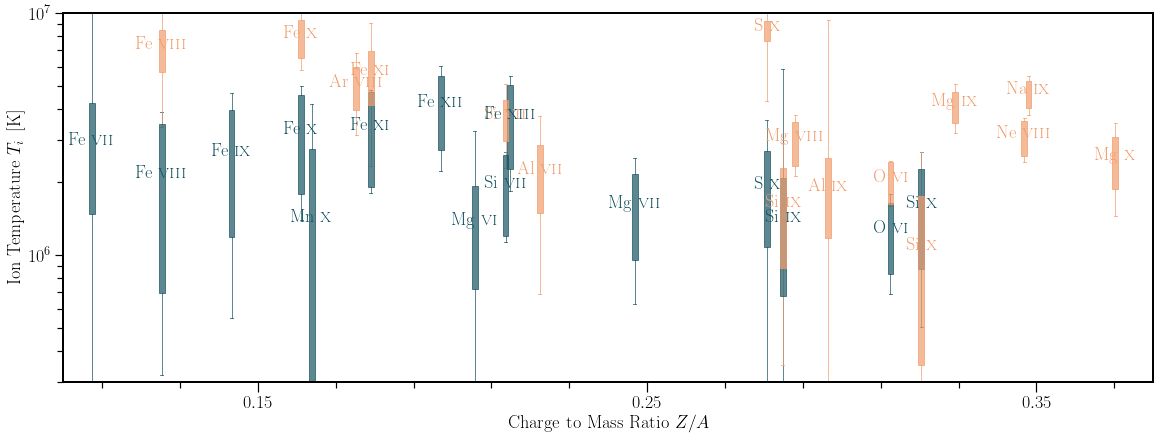

In [34]:
color_sumer = cmcm.batlow(0.75)
color_eis = cmcm.batlow(0.2)
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)
eis_boxprops = dict(edgecolor=color_eis,facecolor=color_eis,alpha=0.7)
eis_capprops = dict(color=color_eis,alpha=0.7)
eis_whiskerprops = dict(color=color_eis,alpha=0.7)

sumer_boxprops = dict(edgecolor=color_sumer,facecolor=color_sumer,alpha=0.7)
sumer_capprops = dict(color=color_sumer,alpha=0.7)
sumer_whiskerprops = dict(color=color_sumer,alpha=0.7)

medianprops= dict(linewidth=0)

ax.bxp(stats_eis,showmeans=False,boxprops=eis_boxprops,capprops=eis_capprops,
        whiskerprops=eis_whiskerprops,medianprops=medianprops,widths=0.0015,patch_artist=True,
        positions=pos_eis,manage_ticks=False)

ax.bxp(stats_sumer,showmeans=False,boxprops=sumer_boxprops,capprops=sumer_capprops,
        whiskerprops=sumer_whiskerprops,medianprops=medianprops,widths=0.0015,patch_artist=True,
        positions=pos_sumer,manage_ticks=False)

for ii, row in df_sumer.iterrows():
    ax.text(row["Z2A"],(row["T_min"]+row["T_max"])/2,row["label"],fontsize=18,color=color_sumer,
        ha="center")

for ii, row in df_eis.iterrows():
    ax.text(row["Z2A"],(row["T_min"]+row["T_max"])/2,row["label"],fontsize=18,color=color_eis,
        ha="center")
ax.set_yscale("log")
ax.set_ylim(3e5,1e7)
ax.set_xlim(0.1,0.38)
ax.set_xticks([0.15,0.25,0.35])
ax.tick_params(labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r"Ion Temperature $T_i\ \left[\mathrm{K}\right]$",fontsize=18)
ax.set_xlabel(r"Charge to Mass Ratio $Z/A$",fontsize=18)

Text(0.5, 0, '\\textbf{Charge to Mass Ratio} $\\boldsymbol{Z/A}$')

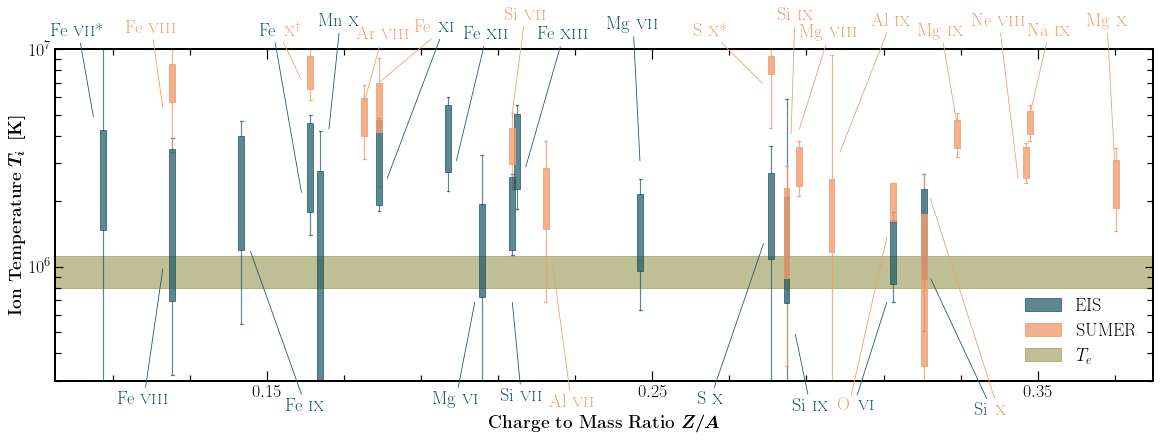

In [35]:
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)
eis_boxprops = dict(edgecolor=color_eis,facecolor=color_eis,alpha=0.7)
eis_capprops = dict(color=color_eis,alpha=0.7,linewidth=1.2)
eis_whiskerprops = dict(color=color_eis,alpha=0.7,linewidth=1.2)

sumer_boxprops = dict(edgecolor=color_sumer,facecolor=color_sumer,alpha=0.8)
sumer_capprops = dict(color=color_sumer,alpha=0.8,linewidth=1.2)
sumer_whiskerprops = dict(color=color_sumer,alpha=0.8,linewidth=1.2)

medianprops= dict(linewidth=0)

eis_bp = ax.bxp(stats_eis,showmeans=False,boxprops=eis_boxprops,capprops=eis_capprops,
        whiskerprops=eis_whiskerprops,medianprops=medianprops,widths=0.0015,patch_artist=True,
        positions=pos_eis,manage_ticks=False)

sumer_bp = ax.bxp(stats_sumer,showmeans=False,boxprops=sumer_boxprops,capprops=sumer_capprops,
        whiskerprops=sumer_whiskerprops,medianprops=medianprops,widths=0.0015,patch_artist=True,
        positions=pos_sumer,manage_ticks=False)

eis_xycoords = [(0.105,4.78e6),(0.123,1e6),(0.1455,1.2e6),(0.159,2.15e6),(0.166,4.2e6),
                (0.181,2.5e6),(0.199,3e6),(0.204,7e5),(0.2136,7e5),(0.217,2.82e6),
                (0.2468,3e6),(0.279,1.3e6),(0.287,5e5),(0.311,7e5),(0.322,9e5)]
eis_textcoords = [(0.101,1.04),(0.118,-0.07),(0.16,-0.09),(0.152,1.025),(0.169,1.07),
                (0.195,1.035),(0.207,1.03),(0.199,-0.07),(0.216,-0.06),(0.227,1.03),
                (0.245,1.06),(0.265,-0.07),(0.291,-0.09),(0.303,-0.05),(0.337,-0.06)]
eis_texts = [r"Fe \textsc{vii}*",r"Fe \textsc{viii}",r"Fe \textsc{ix}",r"",r"Mn \textsc{x}",
            r"",r"Fe \textsc{xii}",r"Mg \textsc{vi}",r"Si \textsc{vii}",r"Fe \textsc{xiii}",
            r"Mg \textsc{vii}",r"S \textsc{x}",r"Si \textsc{ix}",r"",r""]

for ii, text_ in enumerate(eis_texts):
    ax.annotate(text_,eis_xycoords[ii],eis_textcoords[ii],xycoords="data",textcoords=("data","axes fraction"),
    fontsize=18,color=color_eis,ha="center",arrowprops=dict(edgecolor=color_eis,arrowstyle="-",lw=0.8))

sumer_xycoords = [(0.123,5.25e6),(0.159,7.15e6),(0.175,5.5e6),(0.179,7e6),(0.2136,5e6),
                (0.224,1.06e6),(0.279,6.83e6),(0.286,4e6),(0.288,4.2e6),(0.2985,3.29e6),
                (0.311,1.4e6),(0.322,2.1e6),(0.329,4.6e6),(0.345,2.5e6),(0.348,5e6),
                (0.37,3e6)]
sumer_textcoords = [(0.12,1.05),(0.154,1.025),(0.18,1.03),(0.193,1.035),(0.217,1.09),
                (0.229,-0.08),(0.265,1.04),(0.287,1.09),(0.296,1.035),(0.312,1.07),
                (0.3015,-0.05),(0.339,-0.06),(0.325,1.04),(0.34,1.07),(0.353,1.04),
                (0.368,1.07)]
sumer_texts = [r"Fe \textsc{viii}","",r"Ar \textsc{viii}",r"",r"Si \textsc{vii}",
                r"Al \textsc{vii}",r"S \textsc{x}*",r"Si \textsc{ix}",r"Mg \textsc{viii}",r"Al \textsc{ix}",
                r"",r"",r"Mg \textsc{ix}",r"Ne \textsc{viii}",r"Na \textsc{ix}",
                r"Mg \textsc{x}"]

for ii, text_ in enumerate(sumer_texts):
    ax.annotate(text_,sumer_xycoords[ii],sumer_textcoords[ii],xycoords="data",textcoords=("data","axes fraction"),
    fontsize=18,color=color_sumer,ha="center",arrowprops=dict(edgecolor=color_sumer,arrowstyle="-",lw=0.8))

rainbow_text(ax,0.148,1.15e7,[r"$\mathrm{Fe}$",r"e",r"\textsc{x}$^\dagger$"],[color_eis,"white",color_sumer],fontsize=18)
rainbow_text(ax,0.188,1.2e7,[r"$\mathrm{Fe}$",r"e",r"\textsc{xi}"],[color_sumer,"white",color_eis],fontsize=18)
rainbow_text(ax,0.298,2.2e5,[r"$\mathrm{O}$",r"e",r"\textsc{vi}"],[color_sumer,"white",color_eis],fontsize=18)
rainbow_text(ax,0.3335,2.1e5,[r"$\mathrm{Si}$",r"e",r"\textsc{x}"],[color_eis,"white",color_sumer],fontsize=18)

te_hspan = ax.axhspan(10**5.9,10**6.05,color=cmcm.batlow(0.5),alpha=0.5,zorder=0)
ax.legend([eis_bp["boxes"][0],sumer_bp["boxes"][0],te_hspan],["EIS","SUMER",r"$T_e$"],loc="lower right",fontsize=18,frameon=False)
ax.set_yscale("log")
ax.set_ylim(3e5,1e7)
ax.set_xlim(0.095,0.38)
ax.set_xticks([0.15,0.25,0.35])
ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r"\textbf{Ion Temperature} $\boldsymbol{T_i\ \left[\mathrm{K}\right]}$",fontsize=18)
ax.set_xlabel(r"\textbf{Charge to Mass Ratio} $\boldsymbol{Z/A}$",fontsize=18,labelpad=15)
#ax.grid("on",which="both")#
#plt.savefig(fname="../../figs/ms/temp_diag.pdf",format="pdf")

In [36]:
10**(((np.log10(df["T_min"]) + np.log10(df["T_max"]))/2)[25])/1e6

3.0198873651765696

In [37]:
df

,ion,charge,Z,A,temp,inst,veff,veff_err,quality,desc,T_max,T_min,T_max_err,T_min_err,Z2A,label
0,Fe,vii,6,55.85000,5.7,EIS,35.6,18.9,b,NaN,4.256562e+06,1.470802e+06,9.975898e+06,3.358606e-07,0.107431,Fe \textsc{vii}
1,Fe,viii,7,55.85000,5.8,EIS,32.2,1.8,a,NaN,3.482337e+06,6.965758e+05,3.882548e+06,3.181271e+05,0.125336,Fe \textsc{viii}
2,Fe,ix,8,55.85000,5.8,EIS,34.4,2.9,a,NaN,3.974439e+06,1.188679e+06,4.672794e+06,5.468146e+05,0.143241,Fe \textsc{ix}
3,Fe,x,9,55.85000,5.9,EIS,36.9,1.6,a,NaN,4.573111e+06,1.787351e+06,4.978293e+06,1.399363e+06,0.161146,Fe \textsc{x}
4,Fe,xi,10,55.85000,6.0,EIS,37.4,0.4,a,NaN,4.697883e+06,1.912123e+06,4.798910e+06,1.812169e+06,0.179051,Fe \textsc{xi}
5,Fe,xii,11,55.85000,6.1,EIS,40.5,1.9,a,NaN,5.508953e+06,2.723193e+06,6.037967e+06,2.218426e+06,0.196956,Fe \textsc{xii}
6,Fe,xiii,12,55.85000,6.1,EIS,38.8,1.7,a,NaN,5.056179e+06,2.270419e+06,5.508953e+06,1.837056e+06,0.214861,Fe \textsc{xiii}
7,O,vi,5,15.99940,5.6,EIS,41.2,1.9,a,NaN,1.633180e+06,8.351405e+05,1.787286e+06,6.879802e+05,0.312512,O \textsc{vi}
8,Mg,vi,5,24.30500,5.7,EIS,36.4,10.8,b,NaN,1.936575e+06,7.242575e+05,3.256233e+06,1.461610e-07,0.205719,Mg \textsc{vi}
9,Mg,vii,6,24.30500,5.8,EIS,38.5,3.0,a,NaN,2.166471e+06,9.541542e+05,2.517257e+06,6.296761e+05,0.246863,Mg \textsc{vii}
